In [1]:
import qiskit as q
%matplotlib inline

circuit = q.QuantumCircuit(2, 2) # 2 quibits, 2 classical bits

# currently: 0.0
circuit.x(0)
# 1, 0
circuit.cx(0, 1) # cnot, controlled not. Flips 2nd quibit value IF first qubit is 1
# 1, 1
circuit.measure([0, 1], [0, 1])
circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

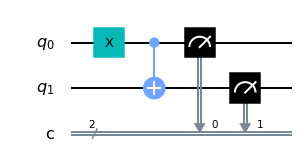

In [2]:
circuit.draw(output="mpl")

In [3]:
from qiskit import IBMQ

IBMQ.save_account(open("token.txt", "r").read())

configrc.store_credentials:WARNING:2020-10-08 11:47:10,270: Credentials already present. Set overwrite=True to overwrite.


In [4]:
IBMQ.load_account()

c:\python38\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [5]:
provider = IBMQ.get_provider("ibm-q")

for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().quibits)
    except:
        qubit_count = "simulated"
        
    print(f"{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits")

ibmq_qasm_simulator has 2 queued and simulated qubits
ibmqx2 has 9 queued and simulated qubits
ibmq_16_melbourne has 37 queued and simulated qubits
ibmq_vigo has 32 queued and simulated qubits
ibmq_ourense has 19 queued and simulated qubits
ibmq_valencia has 31 queued and simulated qubits
ibmq_armonk has 19 queued and simulated qubits
ibmq_santiago has 29 queued and simulated qubits


In [16]:
from qiskit.tools.monitor import job_monitor

backend = provider.get_backend("ibmq_16_melbourne")
job = q.execute(circuit, backend=backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


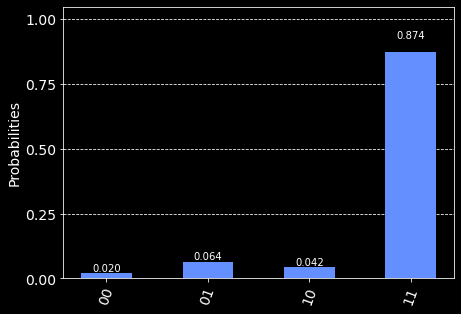

In [17]:
from qiskit.visualization import plot_histogram
from matplotlib import style

style.use("dark_background")

result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])

In [18]:
print(counts)

{'00': 10, '01': 32, '10': 21, '11': 437}


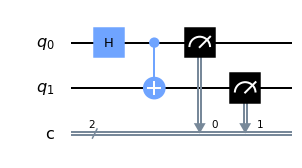

In [19]:
backend = provider.get_backend("ibmq_qasm_simulator")

circuit = q.QuantumCircuit(2, 2) # 2 quibits, 2 classical bits

# currently: 0,0
circuit.h(0)
# 1, 0
# cnot, controlled not. Flips 2nd qubit value IF first qubit is 1
circuit.cx(0, 1) 
# 1, 1
circuit.measure([0, 1], [0, 1])
#circuit.draw()
circuit.draw(output="mpl")

In [20]:
job = q.execute(circuit, backend=backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


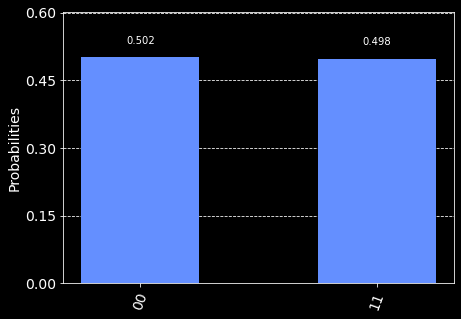

In [21]:
result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])

In [22]:
from qiskit import Aer #simulator framework for qiskit

sim_backend = Aer.get_backend("qasm_simulator")

for backend in Aer.backends():
    print(backend)

qasm_simulator
statevector_simulator
unitary_simulator
pulse_simulator


Job Status: job has successfully run


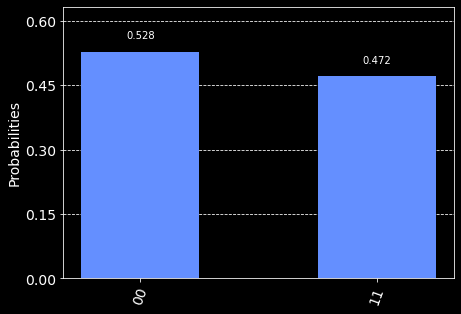

In [23]:
job = q.execute(circuit, backend=sim_backend, shots=500)
job_monitor(job)

result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])